### Initial Setup

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme(style="dark")

In [21]:
df = pd.read_csv("./datasets/proc/monthly_variables.csv.zip", index_col=0, parse_dates=["date"])
df.head()

,date,ICON,IEEX,IFNC,IMAT,IMOB,INDX,UTIL,DOLLAR,GDP,IPCA,SELIC,VIX
0,2007-12-28,1077.90,17305.63,2742.89,2266.68,1000.00,9957.43,1616.45,1.7673,691845.923813,0.74,0.042065,20.740000
1,2008-01-31,1000.39,16089.95,2430.92,2117.63,862.99,9250.33,1510.34,1.7525,726339.305495,0.54,0.042065,26.200001
2,2008-02-29,1098.24,17467.50,2582.65,2382.81,946.39,10223.39,1644.33,1.6785,726339.305495,0.49,0.042065,26.540001
3,2008-03-31,1046.32,16859.00,2343.74,2390.45,801.86,9920.11,1560.65,1.7395,712055.248958,0.48,0.042065,25.610001
4,2008-04-30,1123.95,18024.52,2784.28,2767.40,915.83,11085.73,1667.20,1.6582,712055.248958,0.55,0.043597,20.790001


In [24]:
df_smooth = pd.DataFrame()
df_smooth[df.set_index('date').columns] = df.iloc[:, 1:].ewm(span=40).mean()

### Visualizing all the Data

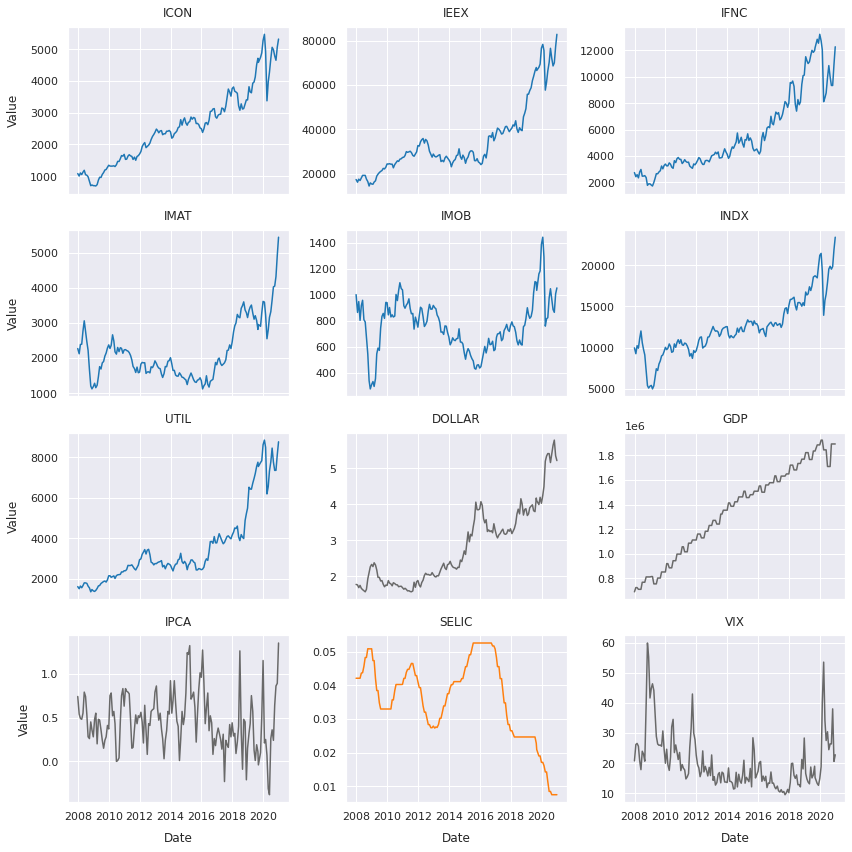

In [25]:
fig, ax = plt.subplots(4,3, figsize=(12,12), sharex=True)

colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue',
          'dimgrey', 'dimgrey', 'dimgrey', 'tab:orange', 'dimgrey']

for i, col in enumerate(df.columns):
    if col != 'date':
        ax[(i-1)//3, (i-1)%3].plot(df["date"], df[col], c=colors[i-1])
        
        if((i-1)%3) == 0:
            ax[(i-1)//3, (i-1)%3].set_ylabel("Value", labelpad=10)
            
        ax[(i-1)//3, (i-1)%3].grid()
        ax[(i-1)//3, (i-1)%3].set_title(col, pad=10)
        #ax[(i-1)//3, (i-1)%3].legend([col], loc='upper left')
        
ax[0,0].set_ylabel("Value", labelpad=10)
ax[1,0].set_ylabel("Value", labelpad=10)
ax[2,0].set_ylabel("Value", labelpad=10)

ax[3,0].set_xlabel("Date", labelpad=10)
ax[3,1].set_xlabel("Date", labelpad=10)
ax[3,2].set_xlabel("Date", labelpad=10)
plt.tight_layout()
plt.show()

### Visualizing Effects of Processing on the Data

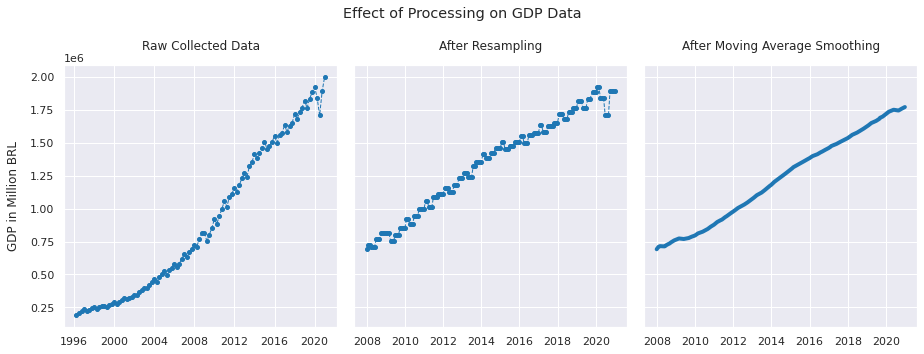

In [34]:
df_gdp = pd.read_csv("./datasets/raw/GDP.csv.zip", usecols=['date', 'rate_value'], parse_dates=["date"])

fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(13,5))

ax1.plot(df_gdp['date'], df_gdp['rate_value'], '--o', c='tab:blue', markersize=4, lw=1)
ax1.set_ylabel('GDP in Million BRL', labelpad=10)
ax1.set_title('Raw Collected Data', pad=15)
ax1.grid()

ax2.plot(df['date'], df['GDP'], '--o', c='tab:blue', markersize=4, lw=1)
ax2.set_title('After Resampling', pad=15)
ax2.grid()

ax3.plot(df['date'], df_smooth['GDP'], '-', c='tab:blue', markersize=4, lw=4)
ax3.set_title('After Moving Average Smoothing', pad=15)
ax3.grid()

fig.suptitle('Effect of Processing on GDP Data')
plt.tight_layout()
plt.show()

### Visualizing Trends in the Data

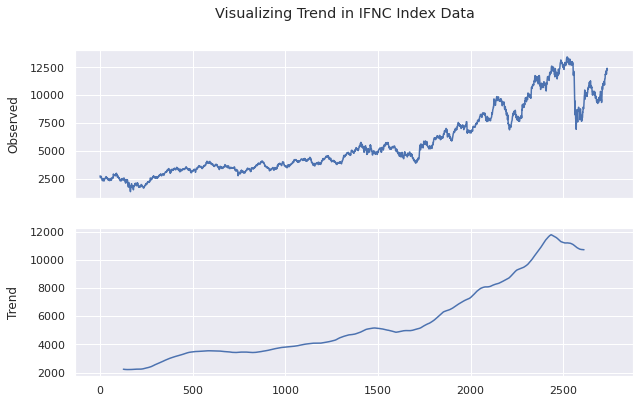

In [5]:
res = seasonal_decompose(df['IFNC'], model='additive', period=253)

fig, axes = plt.subplots(2,1, sharex=True, figsize=(10,6))

res.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed', labelpad=10)
axes[0].grid()

res.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend', labelpad=10)
axes[1].grid()

fig.suptitle('Visualizing Trend in IFNC Index Data')
plt.show()

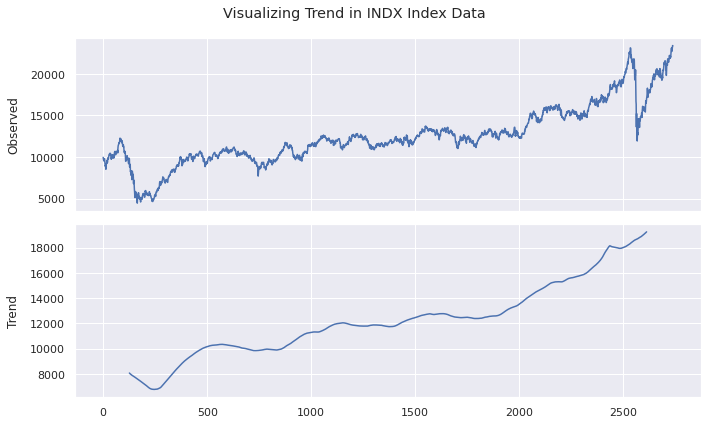

In [6]:
res = seasonal_decompose(df['INDX'], model='additive', period=253)

fig, axes = plt.subplots(2,1, sharex=True, figsize=(10,6))

res.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed', labelpad=10)
axes[0].grid()

res.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend', labelpad=10)
axes[1].grid()

fig.suptitle('Visualizing Trend in INDX Index Data')
plt.tight_layout()
plt.show()

### Visualizing Seasonality in the Data

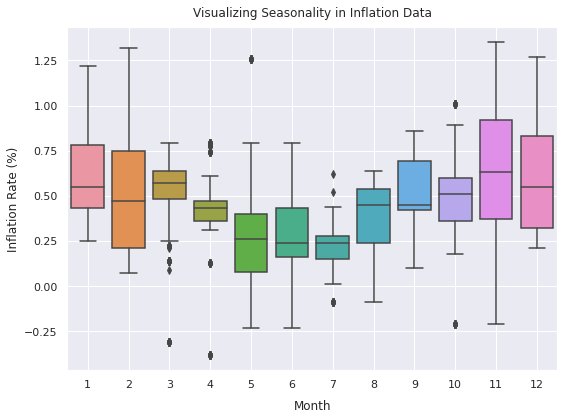

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x=pd.DatetimeIndex(df['date']).month, y='IPCA')
plt.grid()
plt.xlabel('Month', labelpad=10)
plt.ylabel('Inflation Rate (%)')
plt.title('Visualizing Seasonality in Inflation Data', pad=10)
plt.tight_layout()
plt.show()

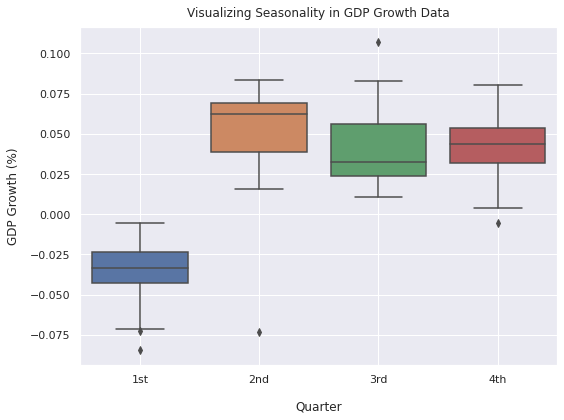

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x=pd.DatetimeIndex(df_gdp['date']).quarter, y=df_gdp['rate_value'].pct_change())
plt.grid()
plt.xlabel('Quarter', labelpad=15)
plt.ylabel('GDP Growth (%)', labelpad=10)
plt.title('Visualizing Seasonality in GDP Growth Data', pad=10)
plt.xticks(ticks=[0,1,2,3], labels=['1st', '2nd', '3rd', '4th'])
plt.tight_layout()
plt.show()